In [1]:
#import libraries for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

In [2]:
# download dataset
#!curl -L -o ./data/ipl.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/850/original/IPL_2008-2024.csv?1760202529"

# 📝 Question 1: Data Preprocessing & Feature Engineering (15 points)

### Task:

1. Load the IPL dataset and perform comprehensive EDA
2. Handle missing values appropriately with justification
3. Create these new features:
   - `home_advantage`: Boolean indicating if team1 is playing in their home city
   - `match_importance`: Categorical (league/playoff/final) based on date and season
   - `toss_advantage`: Whether toss winner won the match
   - `season_phase`: Early/Mid/Late season

### Deliverables:

- Clean dataset with no missing values
- Visualization showing distribution of matches across venues
- Statistical summary of win percentages for toss winners


In [3]:
# load dataset
df = pd.read_csv('./data/ipl.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## EDA on indivisual columns:


## 1. city


Percentage of missing data: 4.66


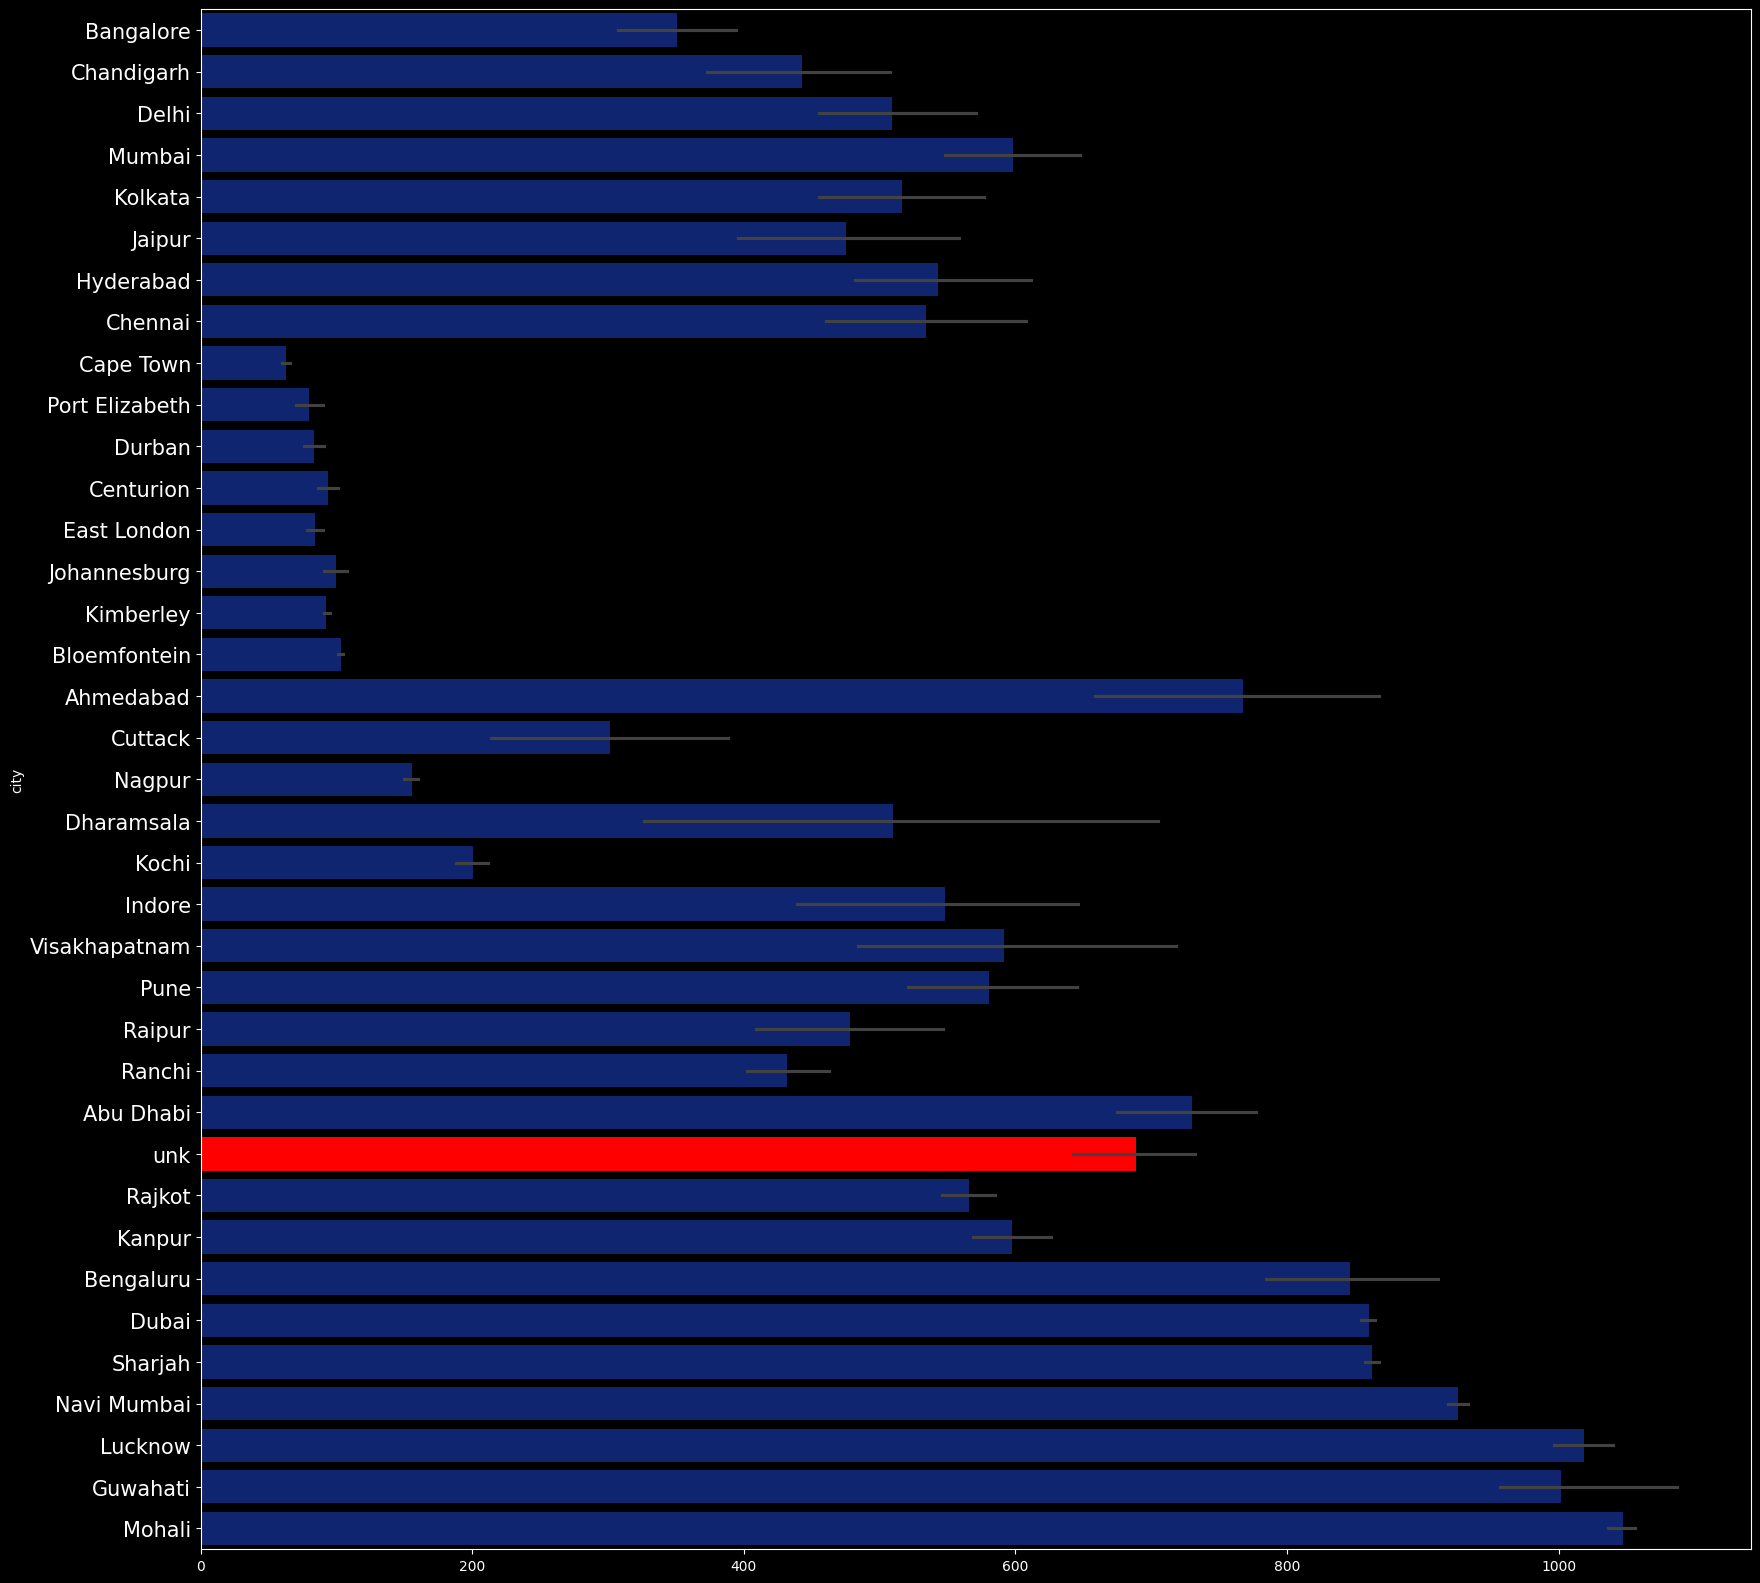

In [5]:
# skip features such as id and session since they are not-null
# columns to check = ['city' , 'player_of_match' , 'winner' , 'result_margin' , 'target_runs/overs' , 'method']

# 1. city:
city = df['city']

pmissing = (np.sum(city.isnull()) / city.size) * 100
print(f"Percentage of missing data: {np.round(pmissing , 2)}")

city = city.fillna('unk')
ax = sns.barplot(city)
bars = ax.patches
yticks = [t.get_text() for t in ax.get_yticklabels()]
yind = yticks.index('unk')
bars[yind].set_facecolor('red')

plt.yticks(fontsize = 15)
plt.show()

df['city'] = city

# stratergy -> replace missing data with unk token, to represent the set of cities that hosted a match but were never mentioned.



### 2. player of match:


In [6]:
pom = df['player_of_match']
df[pom.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- since there are just 5 matches where no result was declared so both player_of_matcha and winner features are missing, we again replace the null value with unk token for sanity purposes(I love nlp!).


In [7]:
df['player_of_match'] = df['player_of_match'].fillna('unk')
df['winner'] = df['winner'].fillna('unk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 3. result_margin


In [8]:
df[df['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2010,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,unk,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


### for missing result_margin, its either a tie or no-result in match/ match abandoned. we replace NaN values with 0, since 0 margin = no-result/tie


In [9]:
df['result_margin'] = df['result_margin'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 4. target_runs/overs:


In [10]:
truns = df['target_runs']
tovers = df['target_overs']
df[tovers.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,0.0,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,0.0,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,unk,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,unk,no result,0.0,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/full-scorecard
- I researched the first match and found out the game was abandoned due to extreme rain.
- This jibes with our previous pre-processing that says no-result for result feature.


### we replace missing target_overs/runs values with zero, via the analogy no item = 0 item.


In [11]:
df['target_runs'] = truns.fillna(0)
df['target_overs'] = tovers.fillna(0)

### 5. method feature:

- if a match finished under normal conditions then no external method to determine the winner of the match was used -> match finished under normal conditions - 1074/1095 matches.


In [12]:
method = df['method']
print(f"% of matches finished normally: { np.sum(method.isnull()) / df.shape[0]}")
df['method'] = method.fillna('normal')

% of matches finished normally: 0.9808219178082191


Q. Create these new features:

- `home_advantage`: Boolean indicating if team1 is playing in their home city
- `match_importance`: Categorical (league/playoff/final) based on date and season
- `toss_advantage`: Whether toss winner won the match
- `season_phase`: Early/Mid/Late season


In [13]:
# addressing the problem of teams that renamed themselves over the years
# 1. Royal Challengers Bangaluru -> Royal Challengers Bangalore
# 2. Kings XI Punjab -> Punjab Kings
# 3. Rising Pune Supergiants -> Rising Pune Supergiant
# 4. Delhi Daredevils -> Delhi Capitals
def change_team_name(x):
    if(x == 'Royal Challengers Bengaluru'):
        return 'Royal Challengers Bangalore'
    if(x == 'Kings XI Punjab'):
        return 'Punjab Kings'
    if(x == 'Rising Pune Supergiants'):
        return 'Rising Pune Supergiant'
    if(x == 'Delhi Daredevils'):
        return 'Delhi Capitals'
    return x
t1 = df['team1'].apply(lambda x: change_team_name(x))
t2 = df['team2'].apply(lambda x : change_team_name(x))
df['team1'] = t1
df['team2'] = t2


print(f"cities: {df['city'].unique()} \n teams: {df['team1'].unique()}")

# create a map of team and home city
# team to city
ttc = {
    'Royal Challengers Bangalore' : ['Bangalore'],
    'Punjab Kings' : ["Mohali" , 'Chandigarh'],
    'Mumbai Indians' : ['Navi Mumbai' , 'Mumbai'],
    'Kolkata Knight Riders' : ['Kolkata'],
    'Rajasthan Royals' : ['Jaipur'],
    'Deccan Chargers' : ['Hyderabad' , 'Cuttuck' , 'Navi Mumbai'],       #deccan had alternating home-grounds
    'Chennai Super Kings' : ['Chennai'],
    'Kochi Tuskers Kerala' : ['Kochi'],
    'Pune Warriors' : ['Pune'],
    'Sunrisers Hyderabad' : ['Hyderabad'],
    'Gujarat Lions': ['Rajkot'],
    'Rising Pune Supergiant' : ['Pune'],
    'Delhi Capitals' : ["Delhi"],
    'Lucknow Super Giants' : ['Lucknow'],
    'Gujarat Titans' : ['Ahmedabad']
}

def is_home_team(data):
    # print(data['city'])
    return data['city'] in ttc[data['team1']]
df['home_advantage'] = df.apply(lambda x : is_home_team(x), axis = 1)

df.sample(5)

cities: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'unk' 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali'] 
 teams: ['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Lucknow Super Giants' 'Gujarat Titans']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage
225,501249,2011,Jaipur,2011-05-09,League,M Vijay,Sawai Mansingh Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,Chennai Super Kings,runs,63.0,197.0,20.0,N,normal,K Hariharan,SJA Taufel,True
367,598042,2013,Pune,2013-05-02,League,AB de Villiers,Subrata Roy Sahara Stadium,Pune Warriors,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Royal Challengers Bangalore,runs,17.0,188.0,20.0,N,normal,Aleem Dar,C Shamshuddin,True
658,1136583,2018,Mumbai,2018-04-24,League,Rashid Khan,Wankhede Stadium,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,...,Sunrisers Hyderabad,runs,31.0,119.0,20.0,N,normal,C Shamshuddin,S Ravi,False
612,1082627,2017,Hyderabad,2017-04-30,League,DA Warner,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,...,Sunrisers Hyderabad,runs,48.0,210.0,20.0,N,normal,AY Dandekar,S Ravi,True
1019,1359544,2023,Bengaluru,2023-05-21,League,Shubman Gill,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,...,Gujarat Titans,wickets,6.0,198.0,20.0,N,normal,Nitin Menon,VK Sharma,False


In [14]:
# match importance
from sklearn.preprocessing import OrdinalEncoder
print(f"{df['match_type'].unique()}")
fcats = df['match_type'].str.strip().str.lower().replace({
    'qualifier 1': 'playoff',
    'qualifier 2': 'playoff',
    'eliminator': 'playoff',
    'semi final': 'playoff',
    '3rd place play-off': 'playoff',
    'league': 'league',
    'final': 'final'
})
df['match_importance'] = pd.Categorical(fcats , categories = ['league' , 'playoff' , 'final'] , ordered = True)
df.sample(10)

['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance
526,980919,2016,Chandigarh,2016-04-17,League,M Vohra,"Punjab Cricket Association IS Bindra Stadium, ...",Punjab Kings,Rising Pune Supergiant,Rising Pune Supergiants,...,wickets,6.0,153.0,20.0,N,normal,S Ravi,C Shamshuddin,True,league
957,1359482,2023,Guwahati,2023-04-05,League,NT Ellis,"Barsapara Cricket Stadium, Guwahati",Punjab Kings,Rajasthan Royals,Rajasthan Royals,...,runs,5.0,198.0,20.0,N,normal,KN Ananthapadmanabhan,MV Saidharshan Kumar,False,league
411,729305,2014,Abu Dhabi,2014-04-26,League,PV Tambe,Sheikh Zayed Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,...,wickets,6.0,71.0,20.0,N,normal,HDPK Dharmasena,C Shamshuddin,False,league
920,1304091,2022,Mumbai,2022-05-01,League,Mohsin Khan,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Delhi Capitals,Lucknow Super Giants,...,runs,6.0,196.0,20.0,N,normal,Chirra Ravikanthreddy,CB Gaffaney,False,league
491,829775,2015,Chandigarh,2015-05-03,League,LMP Simmons,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,...,runs,23.0,173.0,20.0,N,normal,RK Illingworth,VA Kulkarni,True,league
528,980923,2016,Hyderabad,2016-04-18,League,DA Warner,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,...,wickets,7.0,143.0,20.0,N,normal,HDPK Dharmasena,VK Sharma,True,league
404,729291,2014,unk,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Punjab Kings,Kings XI Punjab,...,wickets,7.0,192.0,20.0,N,normal,BF Bowden,M Erasmus,False,league
747,1178427,2019,Chandigarh,2019-05-03,League,Shubman Gill,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,7.0,184.0,20.0,N,normal,BNJ Oxenford,C Shamshuddin,True,league
642,1136567,2018,Hyderabad,2018-04-12,League,Rashid Khan,Rajiv Gandhi International Stadium,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,...,wickets,1.0,148.0,20.0,N,normal,CK Nandan,NJ Llong,False,league
193,501216,2011,Delhi,2011-04-19,League,S Sohal,Feroz Shah Kotla,Delhi Capitals,Deccan Chargers,Deccan Chargers,...,runs,16.0,169.0,20.0,N,normal,PR Reiffel,RJ Tucker,True,league


In [15]:
# toss advantage: weather toss wineer won the match or not!
df['toss_advantage'] = df[['toss_winner' , 'winner']].apply(lambda x : x['toss_winner'] == x['winner'] , axis = 1)
print(f"winning rate of toss winners: {np.round((np.sum(df['toss_advantage']) / df.shape[0]) * 100 , 2)}")
df[['toss_winner' , 'winner' , 'toss_advantage']].sample(10)

winning rate of toss winners: 50.59


,toss_winner,winner,toss_advantage
507,Kolkata Knight Riders,Mumbai Indians,False
33,Royal Challengers Bangalore,Kings XI Punjab,False
1023,Chennai Super Kings,Chennai Super Kings,True
852,Sunrisers Hyderabad,Punjab Kings,False
779,Kolkata Knight Riders,Kolkata Knight Riders,True
162,Kolkata Knight Riders,Chennai Super Kings,False
809,Rajasthan Royals,Kolkata Knight Riders,False
171,Mumbai Indians,Mumbai Indians,True
402,Royal Challengers Bangalore,Royal Challengers Bangalore,True
583,Mumbai Indians,Mumbai Indians,True


In [16]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df = df.sort_values(['season' , 'date']).reset_index(drop = True)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,33.0,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,9.0,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,5.0,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,5.0,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False


In [17]:
df['match_number'] = df.groupby(['season']).cumcount() + 1
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False,1
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True,2
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False,3
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False,4
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False,5


In [18]:
# total matches per season:
# df.groupby('season').agg({'match_number': 'count'}).rename(columns = {'match_number' : 'total_matches'})
total_matches = df.groupby('season').size().to_dict()
df['total_matches'] = df.apply(lambda x : total_matches[x['season']], axis = 1)
df['early_cut'] = (df['total_matches'] / 3).astype(int)
df['mid_cut'] = (2 * df['total_matches'] / 3).astype(int)

def getPhase(x):
    if x['match_number'] < x['early_cut']:
        return 'Early'
    if x['match_number'] < x['mid_cut']:
        return 'Mid'
    return 'Early'
df['season_phase'] = df.apply(getPhase , axis = 1)
df.sample(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase
794,1216494,2020,Abu Dhabi,2020-10-21,League,Mohammed Siraj,Sheikh Zayed Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,...,VK Sharma,S Ravi,False,league,False,39,60,20,40,Mid
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,...,AK Chaudhary,CB Gaffaney,True,league,False,34,59,19,39,Mid
297,548358,2012,Pune,2012-05-08,League,SR Watson,Subrata Roy Sahara Stadium,Pune Warriors,Rajasthan Royals,Pune Warriors,...,Asad Rauf,BR Doctrove,True,league,False,50,74,24,49,Early
1026,1422121,2024,Kolkata,2024-03-23,League,AD Russell,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,R Pandit,YC Barde,True,league,False,3,71,23,47,Early
211,501235,2011,Jaipur,2011-05-01,League,LRPL Taylor,Sawai Mansingh Stadium,Rajasthan Royals,Pune Warriors,Rajasthan Royals,...,SK Tarapore,SJA Taufel,True,league,True,37,73,24,48,Mid
544,980955,2016,Rajkot,2016-05-01,League,AR Patel,Saurashtra Cricket Association Stadium,Gujarat Lions,Punjab Kings,Gujarat Lions,...,BNJ Oxenford,VK Sharma,True,league,False,28,60,20,40,Mid
462,829713,2015,Kolkata,2015-04-11,League,CH Gayle,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,...,S Ravi,C Shamshuddin,True,league,True,5,59,19,39,Early
217,501241,2011,Mumbai,2011-05-04,League,R Sharma,Dr DY Patil Sports Academy,Pune Warriors,Mumbai Indians,Pune Warriors,...,HDPK Dharmasena,SJA Taufel,False,league,False,43,73,24,48,Mid
114,392239,2009,Johannesburg,2009-05-24,Final,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,...,RE Koertzen,SJA Taufel,False,final,False,57,57,19,38,Early
796,1216521,2020,unk,2020-10-23,League,TA Boult,Sharjah Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,...,C Shamshuddin,VA Kulkarni,False,league,True,41,60,20,40,Early


## 📝 Question 2: Text Analytics - Player Performance Analysis (10 points)

### Task:

Using **Bag of Words (BOW)** and **TF-IDF** techniques:

1. Create a corpus from all unique `player_of_match` names across seasons
2. Build a BOW representation of player names
3. Create a TF-IDF matrix to identify most distinctive player names per season
4. Find players who appear most frequently in specific venues

### Bonus:

Create a word cloud of most frequent 'Player of Match' winners

```python
# Your code here
```


In [60]:
# venue column data cleaning:
venue = df['venue']
def clean_venue(venue):
    if ',' in venue:
        return str(venue.strip().split(',')[0])
    return venue

def clean2(venue):
    if venue.startswith('Punjab'):
        return 'Punjab Cricket Association IS Bindra Stadium'
    if 'Chinnaswamy' in venue:
        return 'M.Chinnaswamy Stadium'
    return venue
    
nvenue = venue.apply(clean_venue)
nvenue = nvenue.apply(clean2)
df['nvenue'] = nvenue
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,home_advantage,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase,mom,nvenue
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,True,league,False,1,58,19,38,Early,BB.McCullum,M.Chinnaswamy Stadium
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,True,league,True,2,58,19,38,Early,MEK.Hussey,Punjab Cricket Association IS Bindra Stadium
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,True,league,False,3,58,19,38,Early,MF.Maharoof,Feroz Shah Kotla
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,True,league,False,4,58,19,38,Early,MV.Boucher,Wankhede Stadium
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,True,league,False,5,58,19,38,Early,DJ.Hussey,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,False,league,False,67,71,23,47,Early,Abhishek.Sharma,Rajiv Gandhi International Stadium
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,False,playoff,False,68,71,23,47,Early,MA.Starc,Narendra Modi Stadium
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,False,playoff,True,69,71,23,47,Early,R.Ashwin,Narendra Modi Stadium
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,False,playoff,False,70,71,23,47,Early,Shahbaz.Ahmed,MA Chidambaram Stadium


In [61]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

# convert player names to tokens


df['mom'] = df['player_of_match'].apply(lambda x: ".".join(x.strip().split()))
player_list_per_season = df.groupby('season').agg({'mom': np.unique}).reset_index().rename(columns = {'mom' : 'moms'})
print(f"{player_list_per_season}")

moms = player_list_per_season['moms']
ndoc = []
for season in moms:
    ndoc.append(" ".join(season))
# print(f"{ndoc}")
# convert the player_list_per_season to bow
cvector = CountVectorizer()
bmat = cvector.fit_transform(ndoc)
bow = pd.DataFrame(bmat.toarray() , columns = cvector.get_feature_names_out())
bow.index = [f"season-{str(season)[-2:]}" for season in player_list_per_season['season']]
bow

    season                                               moms
0     2008  [A.Kumble, A.Mishra, A.Nehra, AC.Gilchrist, BB...
1     2009  [A.Kumble, A.Mishra, A.Nehra, A.Singh, AB.de.V...
2     2010  [A.Kumble, A.Symonds, AA.Jhunjhunwala, AC.Voge...
3     2011  [A.Mishra, AB.de.Villiers, AC.Gilchrist, AT.Ra...
4     2012  [A.Chandila, AB.de.Villiers, AC.Gilchrist, AD....
5     2013  [A.Mishra, AB.de.Villiers, AC.Gilchrist, AJ.Fi...
6     2014  [AB.de.Villiers, AJ.Finch, AM.Rahane, AR.Patel...
7     2015  [A.Nehra, AB.de.Villiers, AD.Russell, AM.Rahan...
8     2016  [A.Mishra, A.Nehra, A.Zampa, AB.Dinda, AB.de.V...
9     2017  [AJ.Tye, AR.Patel, AT.Rayudu, B.Kumar, BA.Stok...
10    2018  [A.Mishra, AB.de.Villiers, AD.Russell, AS.Rajp...
11    2019  [A.Mishra, AB.de.Villiers, AD.Russell, AS.Jose...
12    2020  [A.Nortje, AB.de.Villiers, AR.Patel, AT.Rayudu...
13    2021  [A.Mishra, A.Nortje, AB.de.Villiers, AR.Patel,...
14    2022  [AD.Russell, Abhishek.Sharma, Anuj.Rawat, Aves...
15    20

,aa,aaron,ab,abdulla,abhishek,ac,ad,agarwal,ahmed,aj,...,wp,wpujc,wright,yadav,yash,ybk,yk,ys,yuvraj,zampa
season-08,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
season-09,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
season-10,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
season-11,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
season-12,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
season-13,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
season-14,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,1,1,0
season-15,0,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
season-16,0,0,2,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
season-17,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [62]:
tvector = TfidfVectorizer(token_pattern= r'(?u)\b[\w\.]+\b')
tmat = tvector.fit_transform(ndoc)
tfidf = pd.DataFrame(tmat.toarray() , columns = tvector.get_feature_names_out()).round(3)
tfidf.index = [f"season-{str(season)[-2:]}" for season in player_list_per_season['season']]
tfidf 

,a.chandila,a.kumble,a.manohar,a.mishra,a.nehra,a.nortje,a.singh,a.symonds,a.zampa,aa.jhunjhunwala,...,wd.parnell,wg.jacks,wp.saha,wpujc.vaas,yash.thakur,ybk.jaiswal,yk.pathan,ys.chahal,yuvraj.singh,z.khan
season-08,0.00,0.149,0.000,0.101,0.136,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.101,0.000,0.000,0.000
season-09,0.00,0.152,0.000,0.103,0.138,0.000,0.194,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.103,0.000,0.138,0.000
season-10,0.00,0.149,0.000,0.000,0.000,0.000,0.000,0.19,0.000,0.19,...,0.000,0.000,0.000,0.19,0.000,0.000,0.101,0.000,0.000,0.000
season-11,0.00,0.000,0.000,0.095,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.118,0.00,0.000,0.000,0.095,0.000,0.128,0.000
season-12,0.19,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.101,0.000,0.000,0.000
season-13,0.00,0.000,0.000,0.109,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.109,0.000,0.000,0.000
season-14,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.158,0.00,0.000,0.000,0.127,0.171,0.171,0.000
season-15,0.00,0.000,0.000,0.000,0.151,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.212
season-16,0.00,0.000,0.000,0.125,0.168,0.000,0.000,0.00,0.236,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.125,0.000,0.000,0.000
season-17,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.134,0.00,0.000,0.000,0.000,0.000,0.146,0.000


In [63]:
#players who appear more frequently in venues relatively compared with other venues:
vdf = df.groupby('nvenue').agg({'mom': lambda x : list(x)}).reset_index().rename(columns = {'mom': 'moms'})

# convert each venue to a separate document
vdoc = []
for season in vdf['moms']:
    vdoc.append(" ".join(season))
tvector = TfidfVectorizer(token_pattern= r'(?u)\b[\w\.]+\b')
tmat = tvector.fit_transform(vdoc)
tdf = pd.DataFrame(tmat.toarray() , columns = tvector.get_feature_names_out()).round(3)
tdf.index = vdf.nvenue
tdf

,a.chandila,a.kumble,a.manohar,a.mishra,a.nehra,a.nortje,a.singh,a.symonds,a.zampa,aa.jhunjhunwala,...,wd.parnell,wg.jacks,wp.saha,wpujc.vaas,yash.thakur,ybk.jaiswal,yk.pathan,ys.chahal,yuvraj.singh,z.khan
nvenue,,,,,,,,,,,,,,,,,,,,,
Arun Jaitley Stadium,0.000,0.000,0.000,0.258,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barabati Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.737,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barsapara Cricket Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.521,0.000,0.000,0.000,0.000
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.325,0.000,0.000,0.000,0.000,0.000
Brabourne Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.166,0.000,0.000
Buffalo Park,0.000,0.000,0.000,0.000,0.581,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
De Beers Diamond Oval,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Dr DY Patil Sports Academy,0.000,0.156,0.000,0.118,0.130,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.217,0.000,0.137,0.000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,0.000,0.000,0.000,0.000,0.249,0.000,0.000,0.000,0.361,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [65]:
print(f"Top 3 players for each venue:")
for venue in vdf.nvenue:
    print(f"{tdf.loc[venue].sort_values(ascending = False)[:3]}")

Top 3 players for each venue:
i.sharma      0.342
ss.iyer       0.300
rd.gaikwad    0.284
Name: Arun Jaitley Stadium, dtype: float64
a.symonds        0.737
b.lee            0.368
kc.sangakkara    0.316
Name: Barabati Stadium, dtype: float64
nt.ellis       0.675
sm.curran      0.521
ybk.jaiswal    0.521
Name: Barsapara Cricket Stadium, dtype: float64
mp.stoinis       0.426
sikandar.raza    0.325
ma.wood          0.325
Name: Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, dtype: float64
kuldeep.yadav    0.499
sr.tendulkar     0.300
th.david         0.229
Name: Brabourne Stadium, dtype: float64
jp.duminy    0.652
a.nehra      0.581
ms.dhoni     0.486
Name: Buffalo Park, dtype: float64
s.badrinath         0.715
dpmd.jayawardene    0.552
dr.smith            0.429
Name: De Beers Diamond Oval, dtype: float64
de.bollinger    0.377
q.de.kock       0.291
yk.pathan       0.217
Name: Dr DY Patil Sports Academy, dtype: float64
a.zampa     0.361
kk.ahmed    0.325
ab.dinda    0.325
Name